In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, f1_score,confusion_matrix,classification_report,roc_auc_score)
from xgboost import XGBClassifier
import pickle

In [2]:
import sys
print(sys.version)


3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]


In [3]:
print(pd.__version__)
print(np.__version__)
# !pip install numpy==1.24.4

2.2.3
2.1.3


In [4]:
df=pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)

In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

C:\Users\khavy\AppData\Local\Temp\ipykernel_23568\3887903077.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
C:\Users\khavy\AppData\Local\Temp\ipykernel_23568\3887903077.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [8]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [9]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
df['loan_status'].value_counts(normalize=True) * 100

loan_status
0    78.183604
1    21.816396
Name: proportion, dtype: float64

In [11]:
df['loan_status'].unique()

array([1, 0])

In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('loan_status')

num_cols


Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

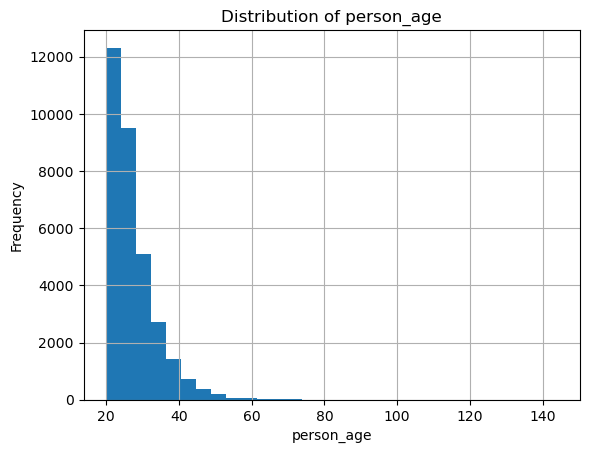

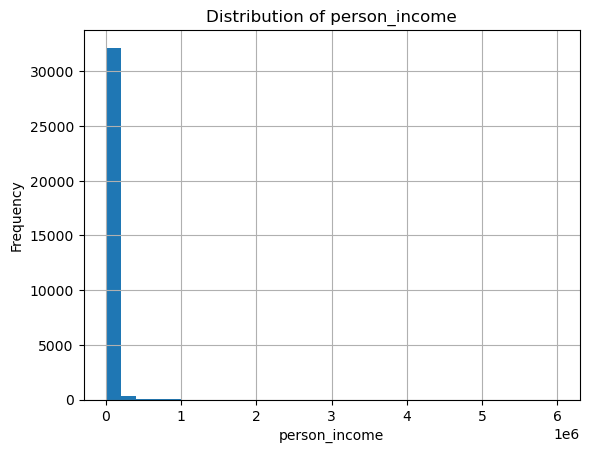

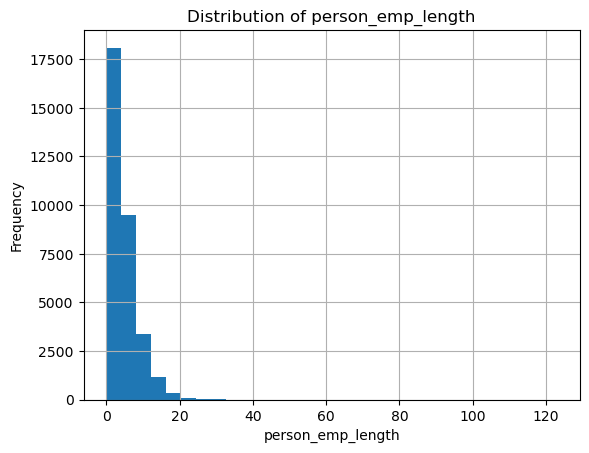

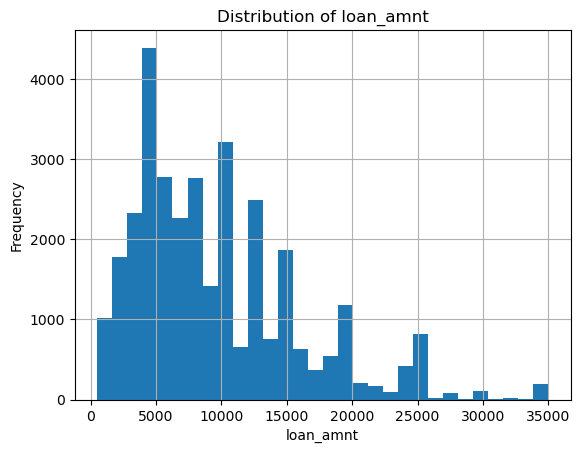

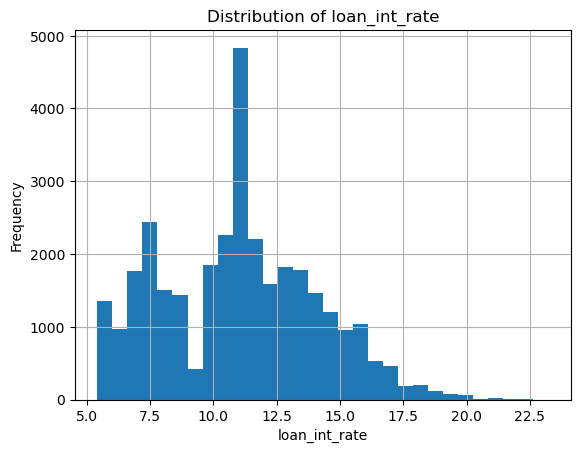

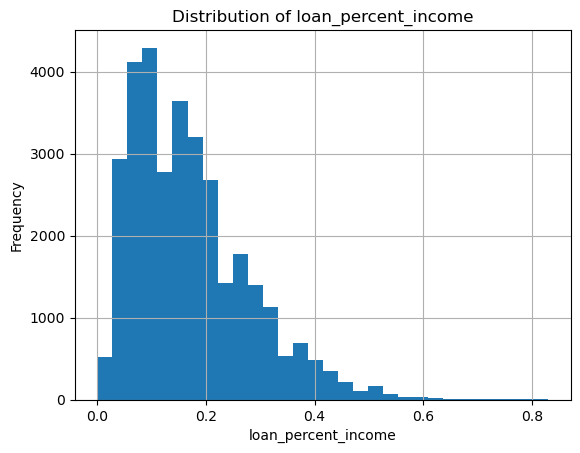

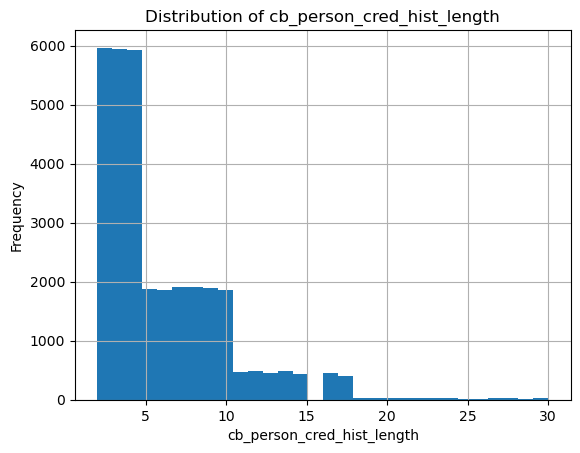

In [13]:
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


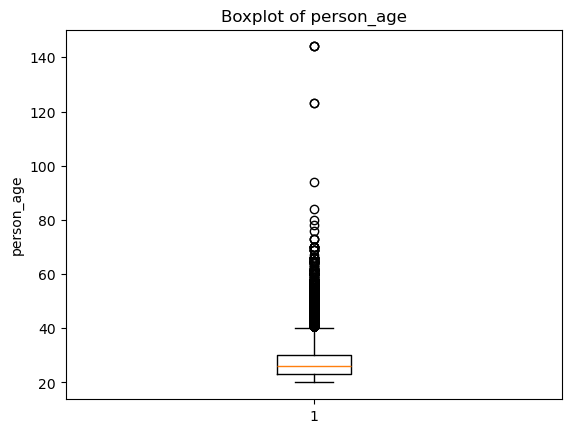

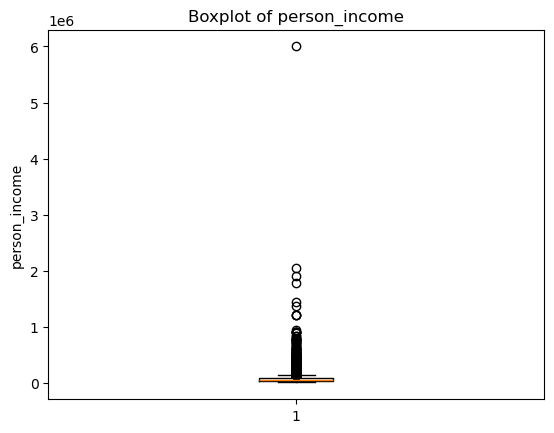

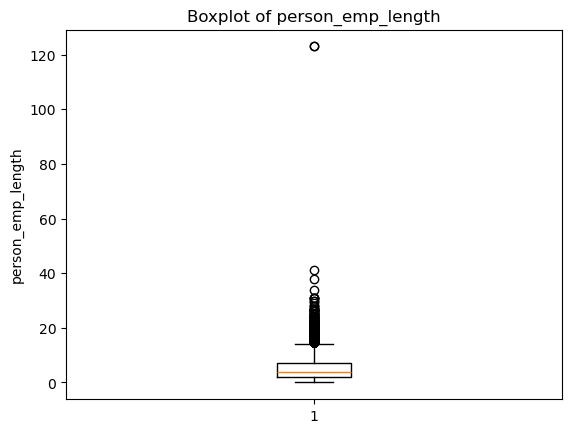

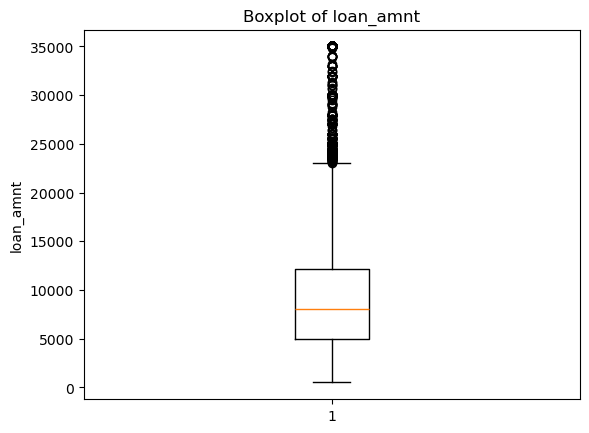

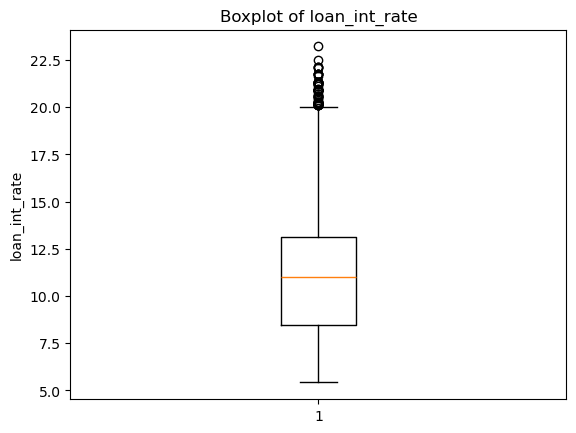

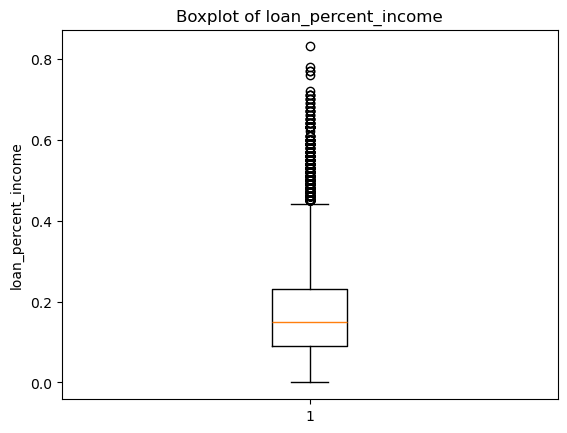

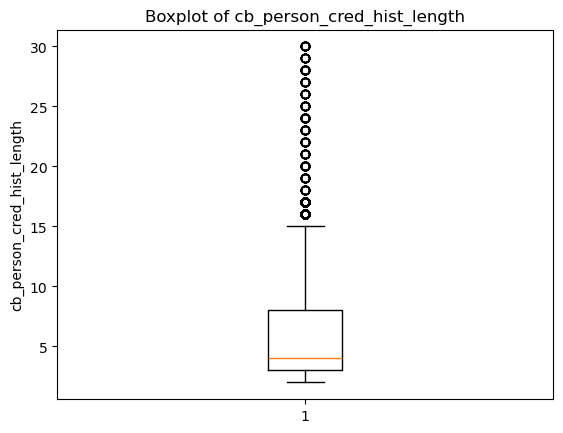

In [14]:
for col in num_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()


In [15]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

for col in num_cols:
    cap_outliers(df, col)


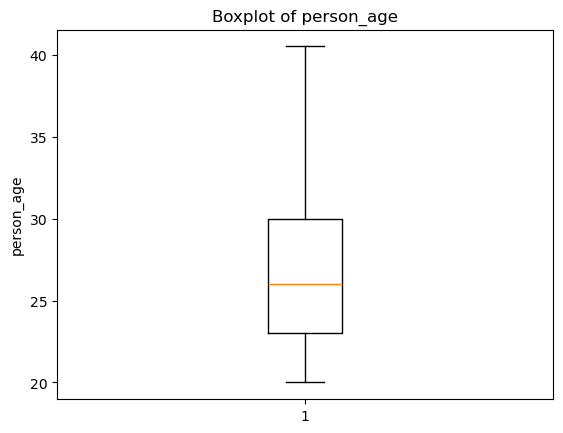

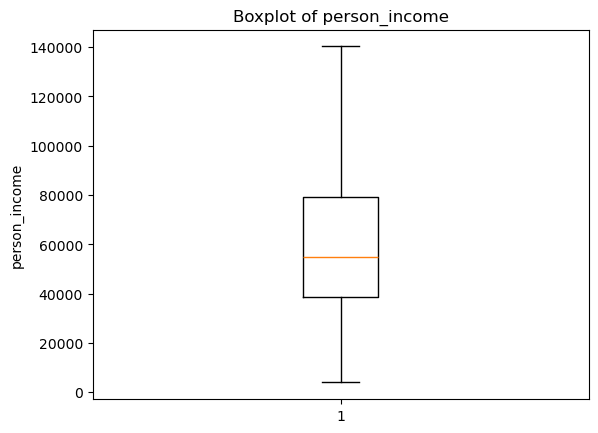

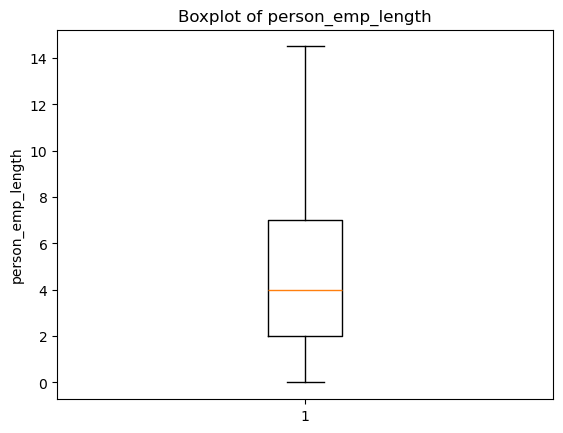

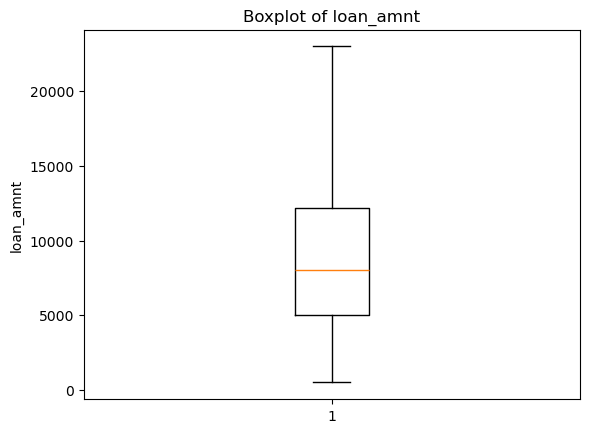

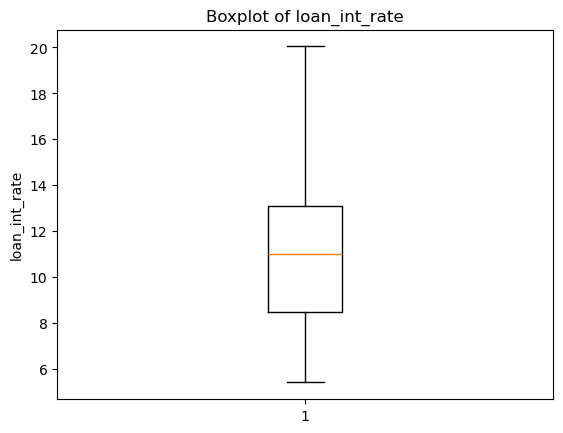

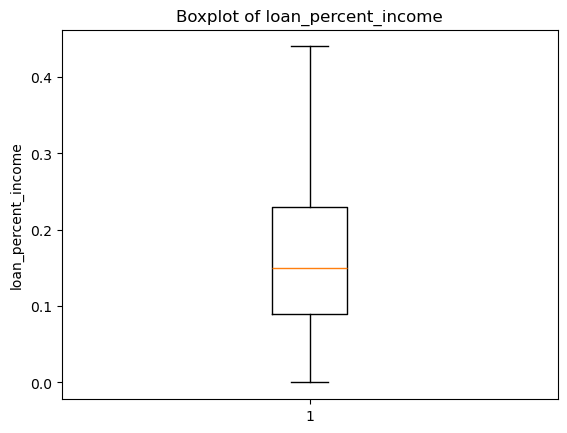

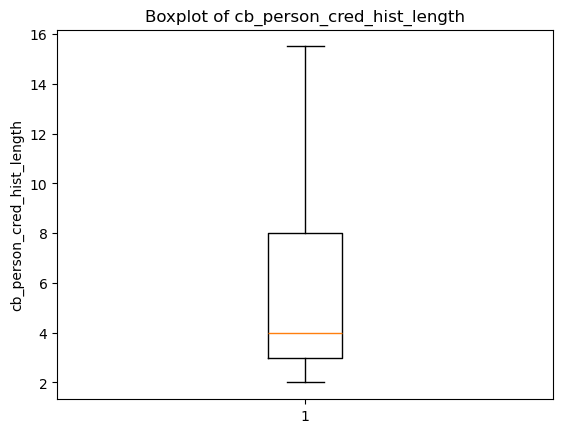

In [16]:
for col in num_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()


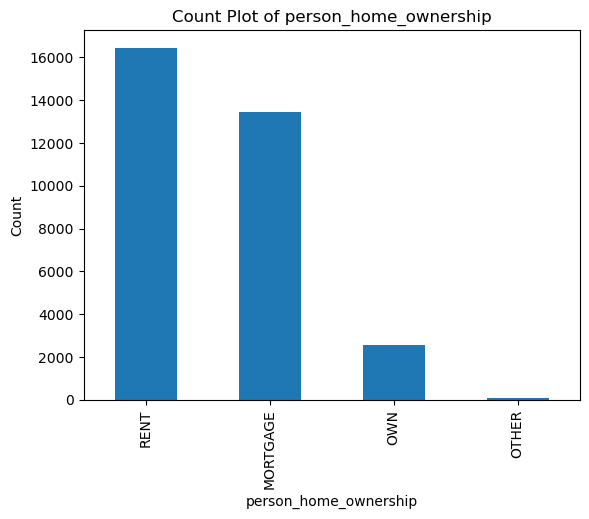

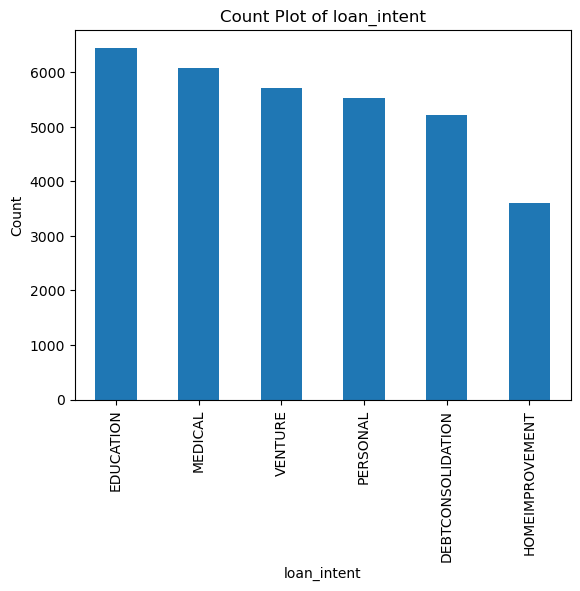

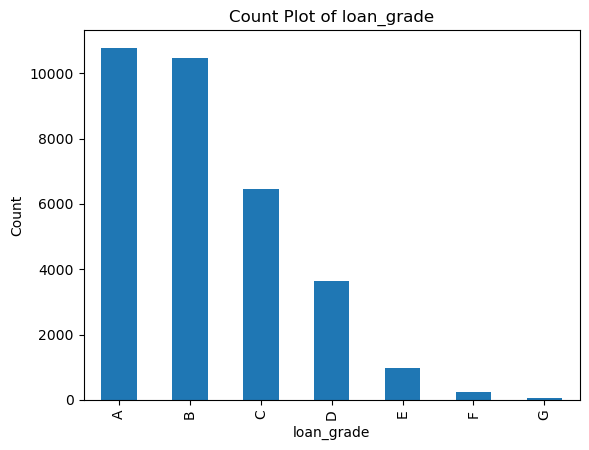

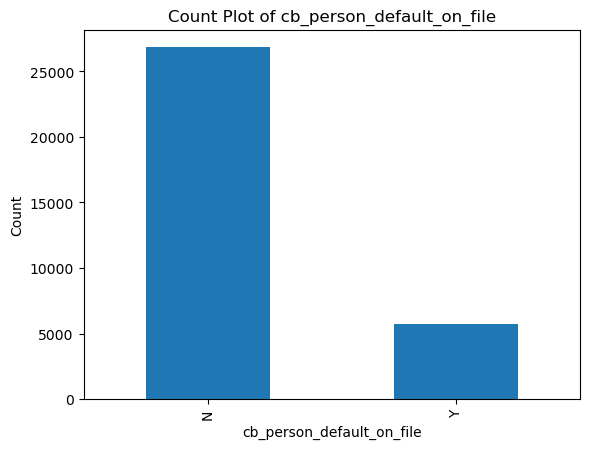

In [17]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {col}')
    plt.show()



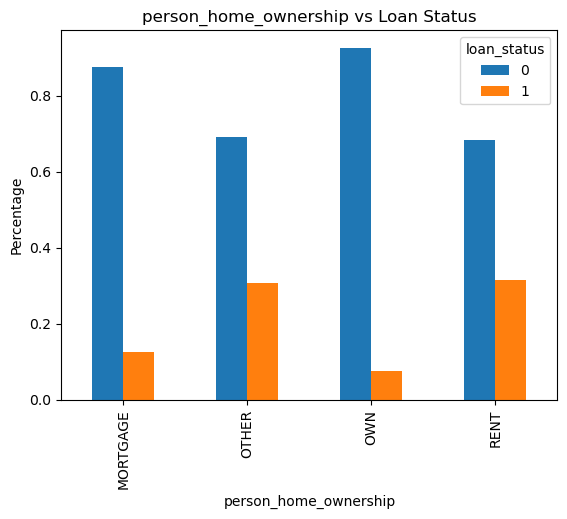

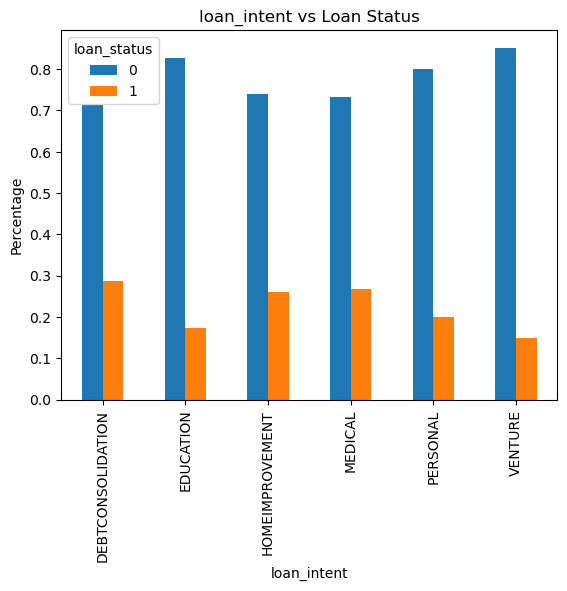

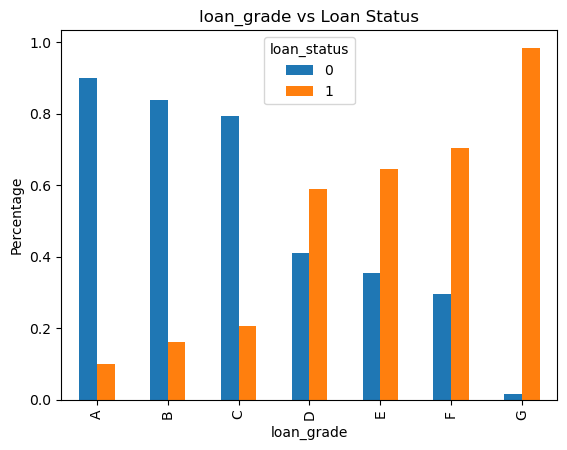

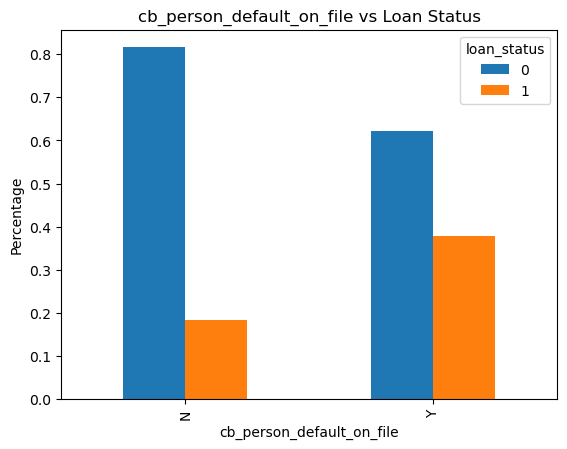

In [18]:
for col in cat_cols:
    pd.crosstab(df[col], df['loan_status'], normalize='index').plot(kind='bar')
    plt.title(f'{col} vs Loan Status')
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.show()



In [19]:
# sns.pairplot(df,hue="loan_status")

In [20]:
df = df.drop(df[df['person_age'] > 80].index, axis=0)
#dropping age above 80

In [21]:
df['age_group'] = pd.cut(df['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [22]:
df['age_group'].dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-65'], ordered=True, categories_dtype=object)

In [23]:
df['income_group'] = pd.cut(df['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [24]:
df['loan_amount_group'] = pd.cut(df['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [25]:
df = df.drop(df[df['person_emp_length'] > 60].index, axis=0)

In [26]:
# Create loan-to-income ratio
df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']

# Create loan-to-employment length ratio
df['loan_to_emp_length_ratio'] =  df['person_emp_length']/ df['loan_amnt'] 

# Create interest rate-to-loan amount ratio
df['int_rate_to_loan_amt_ratio'] = df['loan_int_rate'] / df['loan_amnt']

In [27]:
X = df.drop(['loan_status'], axis=1)
Y = df['loan_status']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=12,
    stratify=Y
)

In [29]:
print(x_train.shape,x_test.shape)

(26064, 17) (6517, 17)


In [30]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)

In [31]:
x_train.select_dtypes(include='object').columns


Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [32]:
cat_cols = x_train.select_dtypes(include=['object', 'category']).columns

freq_encoding_maps = {}

for col in cat_cols:
    freq_encoding_maps[col] = x_train[col].value_counts().to_dict()
    x_train[col] = x_train[col].astype(str).map(freq_encoding_maps[col])
    x_test[col] = x_test[col].astype(str).map(freq_encoding_maps[col]).fillna(0)


In [39]:
x_train = x_train.copy()
x_test = x_test.copy()

num_cols = x_train.select_dtypes(include=['int64','float64']).columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])


In [40]:
x_train.dtypes

index                         float64
person_age                    float64
person_income                 float64
person_home_ownership         float64
person_emp_length             float64
loan_intent                   float64
loan_grade                    float64
loan_amnt                     float64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file     float64
cb_person_cred_hist_length    float64
age_group                     float64
income_group                  float64
loan_amount_group             float64
loan_to_income_ratio          float64
loan_to_emp_length_ratio      float64
int_rate_to_loan_amt_ratio    float64
dtype: object

In [41]:
# Fill missing numeric values with 0
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)


In [42]:
y_train.value_counts()
y_test.value_counts()


loan_status
0    5095
1    1422
Name: count, dtype: int64

In [43]:
x_train.isna().sum().sort_values(ascending=False)


index                         0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
age_group                     0
income_group                  0
loan_amount_group             0
loan_to_income_ratio          0
loan_to_emp_length_ratio      0
int_rate_to_loan_amt_ratio    0
dtype: int64

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)
lr_prob = lr.predict_proba(x_test)[:, 1]

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("F1 (weighted):", f1_score(y_test, lr_pred, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, lr_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))


Logistic Regression
Accuracy: 0.79729937087617
F1 (weighted): 0.8099447011559877
ROC-AUC: 0.8681803814721419
Confusion Matrix:
 [[4080 1015]
 [ 306 1116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86      5095
           1       0.52      0.78      0.63      1422

    accuracy                           0.80      6517
   macro avg       0.73      0.79      0.74      6517
weighted avg       0.84      0.80      0.81      6517



In [45]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=5,
    class_weight='balanced',
    random_state=42
)

dt.fit(x_train, y_train)

dt_pred = dt.predict(x_test)
dt_prob = dt.predict_proba(x_test)[:, 1]

print("Decision Tree")
print("F1 (weighted):", f1_score(y_test, dt_pred, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, dt_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))


Decision Tree
F1 (weighted): 0.8892599189699504
ROC-AUC: 0.8909248194294342
Confusion Matrix:
 [[4708  387]
 [ 339 1083]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      5095
           1       0.74      0.76      0.75      1422

    accuracy                           0.89      6517
   macro avg       0.83      0.84      0.84      6517
weighted avg       0.89      0.89      0.89      6517



In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train, y_train)

rf_pred = rf.predict(x_test)
rf_prob = rf.predict_proba(x_test)[:, 1]

print("Random Forest")
print("F1 (weighted):", f1_score(y_test, rf_pred, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, rf_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest
F1 (weighted): 0.8995317866585875
ROC-AUC: 0.9164780561732153
Confusion Matrix:
 [[4766  329]
 [ 326 1096]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      5095
           1       0.77      0.77      0.77      1422

    accuracy                           0.90      6517
   macro avg       0.85      0.85      0.85      6517
weighted avg       0.90      0.90      0.90      6517



In [47]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    eval_metric='logloss',
    random_state=42
)

xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)
xgb_prob = xgb.predict_proba(x_test)[:, 1]

print("XGBoost")
print("F1 (weighted):", f1_score(y_test, xgb_pred, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, xgb_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))


XGBoost
F1 (weighted): 0.9303650509484894
ROC-AUC: 0.9619315978131396
Confusion Matrix:
 [[4911  184]
 [ 265 1157]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      5095
           1       0.86      0.81      0.84      1422

    accuracy                           0.93      6517
   macro avg       0.91      0.89      0.90      6517
weighted avg       0.93      0.93      0.93      6517



In [48]:
xgb.feature_names_in_


array(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'age_group', 'income_group', 'loan_amount_group',
       'loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio'], dtype='<U26')

In [56]:
artifact = {
    'model': xgb,
    'scaler': scaler,
    'freq_encoding_maps': freq_encoding_maps,
    'feature_names': xgb.feature_names_in_
}
with open('credit_risk_artifacts.csv', "rb") as f:
    artifact = pickle.load(f)

model = artifact["model"]
scaler = artifact["scaler"]
freq_encoding_maps = artifact["freq_encoding_maps"]
feature_names = artifact["feature_names"]

# pickle.dump(artifact, open('credit_risk_artifacts.csv', 'wb'))
# model = pickle.load(open('credit_risk_artifacts.csv', "rb"))

In [57]:
input_data = {
    'person_age': 28,
    'person_income': 45000,
    'person_emp_length': 5,
    'loan_amnt': 12000,
    'loan_int_rate': 11.5,
    'loan_percent_income': 0.25,
    'cb_person_cred_hist_length': 4,
    'person_home_ownership': 'RENT',
    'loan_intent': 'EDUCATION',
    'loan_grade': 'B',
    'cb_person_default_on_file': 'N',
    'age_group': '26-35',
    'income_group': 'low-middle',
    'loan_amount_group': 'large',
    'loan_to_income_ratio': 12000 / 45000,
    'loan_to_emp_length_ratio': 5 / 12000,
    'int_rate_to_loan_amt_ratio': 11.5 / 12000
}
input_df = pd.DataFrame([input_data])

In [61]:
# input_df = input_df[feature_names_in_]

In [62]:
prediction = model.predict(input_df)
prediction_prob = model.predict_proba(input_df)[:, 1]

print("Loan Status Prediction:", prediction[0])
print("Default Probability:", prediction_prob[0])


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:person_home_ownership: object, loan_intent: object, loan_grade: object, cb_person_default_on_file: object, age_group: object, income_group: object, loan_amount_group: object